In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# First Order ODEs (Ordinary Differential Equations)

In [ ]:
# Air friction while falling: 
# dv/dt - a*v^2 + b = 0 --- Conditional = v(0) = 0 (v of time = 0 is equal to 0)

# Rewrite:
# dv/dt = f(t, v)

# dv/dt = a*v^2 - b

def dvdt(t, v):
  return 3*v**2 - 5 #if a = 3 and b = 5
v0 = 0 # v(0) = 0

Two main ODE solvers in Scipy:

odeint: Pretty classic, uses a particular solve called lsoda from the FORTRAN library odepack

solve_ivp: More customizable, can choose from a list of possible solvers

In [ ]:
t = np.linspace(0, 1, 100) # plots 100 points using dvdt b/t 0 and 1
sol_m1 = odeint(dvdt, y0=v0, t=t, tfirst=True)
sol_m2 = solve_ivp(dvdt, t_span=(0,max(t)), y0=[v0], t_eval=t)

In [ ]:
# sol_m1 # entire array
# sol_m1.T # transpose array

#sol_m1.T[0] # Velocity as a function of time
#sol_m2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.010e-02 ...  9.899e-01  1.000e+00]
        y: [[ 0.000e+00 -5.048e-02 ... -1.290e+00 -1.290e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0

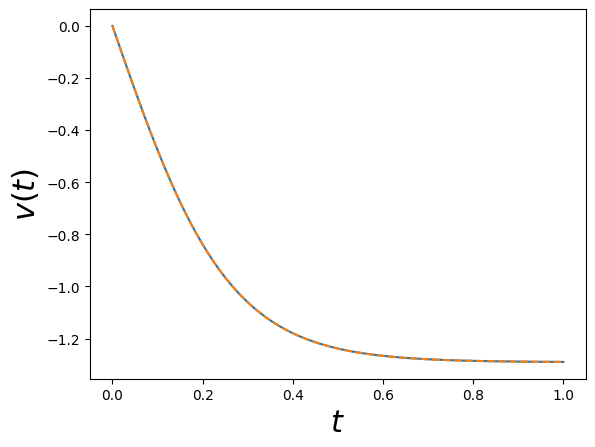

In [ ]:
# Extracting solutions
v_sol_m1 = sol_m1.T[0]
v_sol_m2 = sol_m2.y[0]

# Plot
plt.plot(t, v_sol_m1)
plt.plot(t, v_sol_m2, '--')
plt.ylabel('$v(t)$', fontsize=22)
plt.xlabel('$t$', fontsize=22)
plt.show()

Define a function that contains initial conditions/ODE

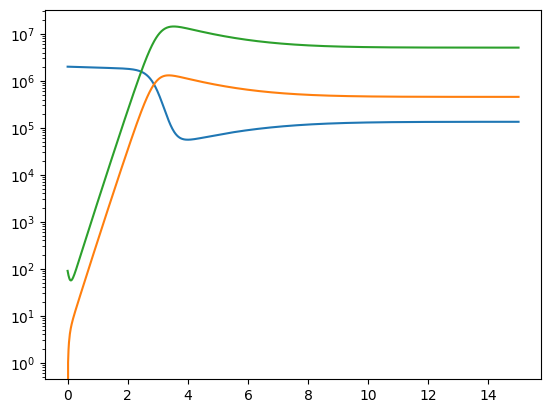

In [ ]:
def odes(x, t):
  # Constants
  a1 = 3e5
  a2 = 0.2
  a3 = 4e-7
  a4 = 0.6
  a5 = 8
  a6 = 90

  # Assign each ODE to a vector element
  A = x[0]
  B = x[1]
  C = x[2]

  # Define ODEs
  dAdt = a1 - a2*A - a3*A*C
  dBdt = a3*A*C - a4*B
  dCdt = -a3*A*C - a5*C + a6*B

  return[dAdt, dBdt, dCdt]


# Initial Conditions  
x0 = [2e6, 0, 90]

# Declare a time vector (time window)
t = np.linspace(0, 15, 1000)
x = odeint(odes, x0, t)

A = x[:, 0]
B = x[:, 1]
C = x[:, 2]

# Plot
plt.semilogy(t, A)
plt.semilogy(t, B)
plt.semilogy(t, C)

Text(0, 0.5, 'y(t)')

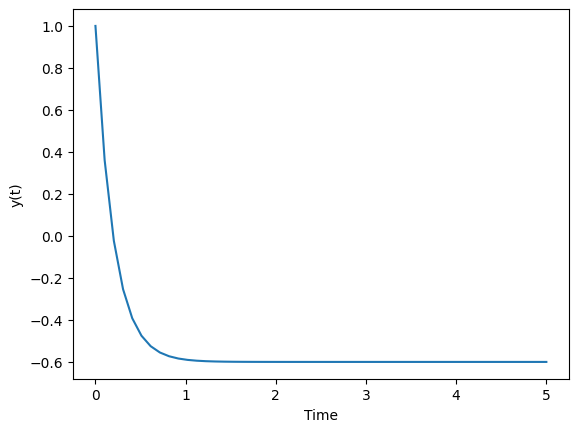

In [ ]:
# Define function
def model(y, t):
  dydt = -5*y - 3
  return dydt

# Initial conditions
y0 = 1

# Time Points
t = np.linspace(0, 5)

# Solve
y = odeint(model, y0, t)

# Plot
plt.plot(t, y)
plt.xlabel("Time")
plt.ylabel("y(t)")

Text(0, 0.5, 'y(t)')

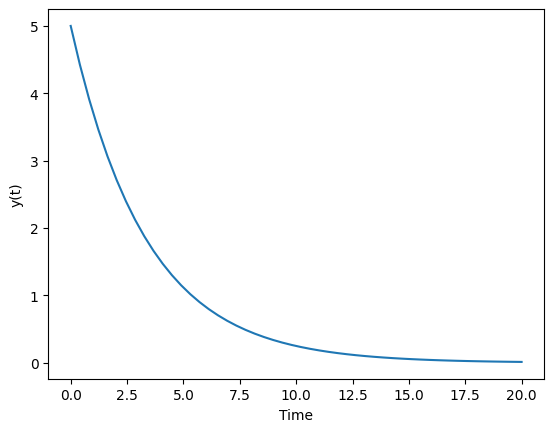

In [ ]:
# Define function that returns dy/dt
def model(y, t):
  k = 0.3
  dydt = -k * y
  return dydt

# Initial Conditions
y0 = 5

# Time Points
t = np.linspace(0, 20)

# Solve ODE
y = odeint(model, y0, t)

# Plot
plt.plot(t, y)
plt.xlabel("Time")
plt.ylabel("y(t)")

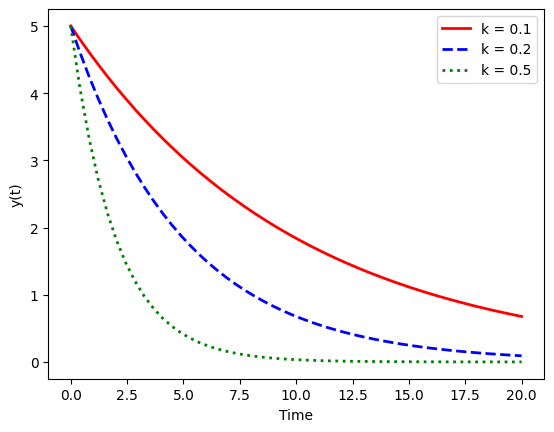

In [ ]:
# Passing additional arguments

# Function that returns dy/dt
def model(y, t, k):
  dydt = -k * y
  return dydt

# Initial Condition
y0 = 5

# Time Points
t = np.linspace(0, 20)

# Solve ODE for different values of k

k = 0.1
y1 = odeint(model, y0, t, args=(k, ))

k = 0.2
y2 = odeint(model, y0, t, args=(k, ))

k = 0.5
y3 = odeint(model, y0, t, args=(k, ))

# Plot
plt.plot(t, y1, 'r-', linewidth = 2, label = "k = 0.1")
plt.plot(t, y2, 'b--', linewidth = 2, label = "k = 0.2")
plt.plot(t, y3, 'g:', linewidth = 2, label = "k = 0.5")
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.legend(loc = "best")

Text(0, 0.5, 'y(t)')

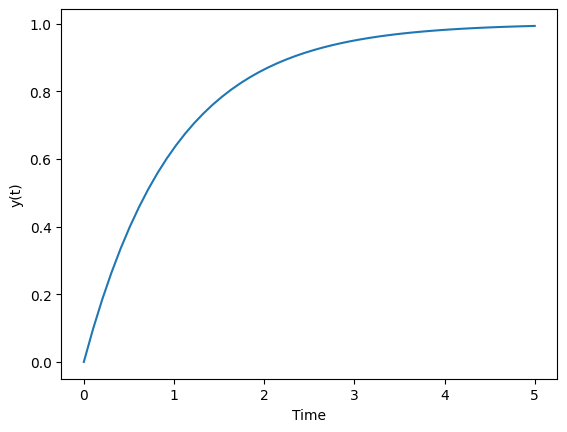

In [ ]:
# Function that returns dy/dt
def model(y, t):
    dydt = -y + 1
    return dydt

# Initial Condition
y0 = 0

# Time Points
t = np.linspace(0, 5)

# Solve ODE
y = odeint(model, y0, t)

# plot results
plt.plot(t, y)
plt.xlabel("Time")
plt.ylabel("y(t)")

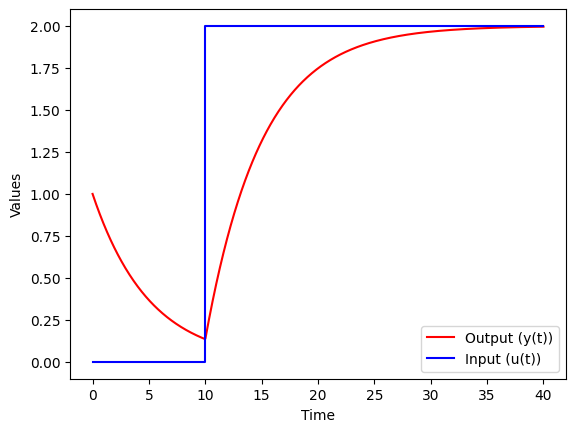

In [ ]:
# Function that returns dy/dt
def model(y, t):
    # u steps from 0 to 2 at t = 10
    if t < 10:
        u = 0
    else:
        u = 2
    dydt = (-y + u) / 5
    return dydt

# Initial Condition
y0 = 1

# Time Points
t = np.linspace(0, 40, 1000)

# Solve ODE
y = odeint(model, y0, t)

# Plot
plt.plot(t, y, "r-", label = "Output (y(t))")
plt.plot([0, 10, 10, 40], [0, 0, 2, 2], "b-", label = "Input (u(t))")
plt.ylabel("Values")
plt.xlabel("Time")
plt.legend(loc = "best")

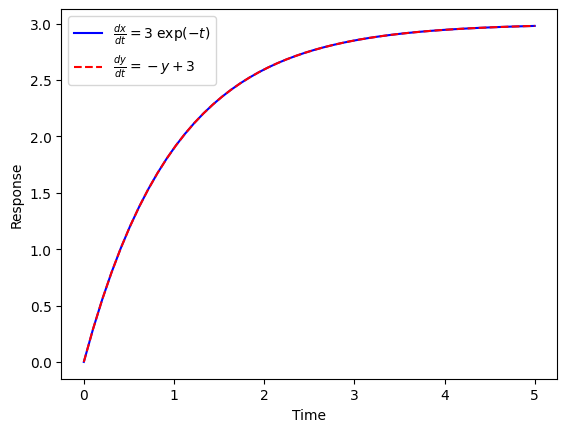

In [ ]:
# Define function that returns dz/dt
def model(z, t):
  dxdt = 3 * np.exp(-t)
  dydt = -z[1] + 3
  dzdt = [dxdt, dydt]
  return dzdt

# Initial Condition
z0 = [0, 0]

# Time Points
t = np.linspace(0, 5)

# Solve ODE
z = odeint(model, z0, t)


# Plot
plt.plot(t, z[:, 0], "b-", label = r"$\frac{dx}{dt} = 3 \; \exp(-t)$")
plt.plot(t, z[:, 1], "r--", label = r"$\frac{dy}{dt} = -y + 3$")
plt.ylabel("Response")
plt.xlabel("Time")
plt.legend(loc = "best")

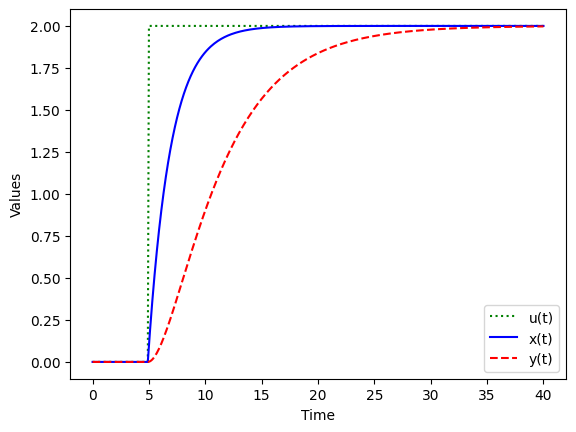

In [2]:
# Define function that returns dz/dt
def model (z, t, u):
  x = z[0]
  y = z[1]
  dxdt = (-x + u) / 2
  dydt = (-y + x) / 5
  dzdt = [dxdt, dydt]
  return dzdt

# Initial Condition
z0 = [0, 0]

# Numer of Time Points
n = 401

# Time Points
t = np.linspace(0, 40, n)

# Step Input
u = np.zeros(n)

# Change to 2 at t = 5
u[50:] = 2

# Store Solution
x = np.empty_like(t)
y = np.empty_like(t)

# Record Initial Conditions
x[0] = z0[0]
y[0] = z0[1]

# Solve ODE
for i in range(1, n):
  # Span for next time step
  tspan = [t[i - 1], t[i]]

  # Solve for next step
  z = odeint(model, z0, tspan, args = (u[i],))

  # Store solution for plotting
  x[i] = z[1][0]
  y[i] = z[1][1]

  # Next Initial Condition
  z0 = z[1]

# Plot
plt.plot(t, u, "g:", label = "u(t)")
plt.plot(t, x, "b-", label = "x(t)")
plt.plot(t, y, "r--", label = "y(t)")
plt.ylabel("Values")
plt.xlabel("Time")
plt.legend(loc = "best")

# Coupled First Order ODEs

In [ ]:
# Setting up ODE

def dSdx(x, S):
    y1, y2 = S
    return [y1 + y2**2  + 3*x, 3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [ ]:
# Solving ODE

x = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=x, tfirst=True)

In [ ]:
# Getting y1 and y2 from solution

y1_sol = sol.T[0]
y2_sol = sol.T[1]

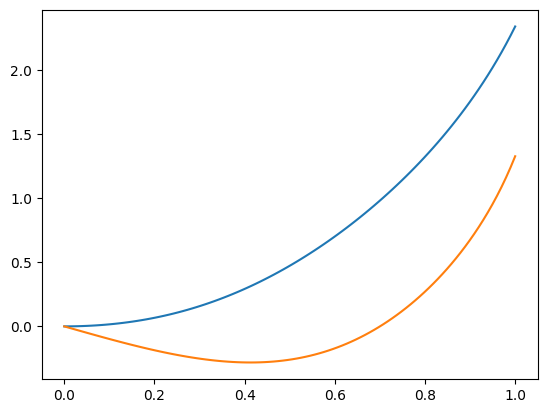

In [ ]:
# Plotting

plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

# Second Order ODEs

Python does NOT have a functionality to solve 2nd Order ODEs

However, any 2nd (or nth) Order ODE can be converted to a system of 1st Order ODEs

To convert into 1st Order ODEs:

1. Take x (what you're trying to solve for). Define x = v so that v becomes new variable.

2. x(dot) = v is one DE

3. v(dot) = x(2dot) = -x**2(dot) + sin(x) = -v**2 + sin(x) is another DE

In [ ]:
# Define ODEs

def dSdx(x, S):
    x, v = S
    return [v, -v**2 + np.sin(x)]
x_0 = 0
v_0 = 5
S_0 = (x_0, v_0)

In [ ]:
t = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=t, tfirst=True)

In [ ]:
x_sol = sol.T[0]
v_sol = sol.T[1]

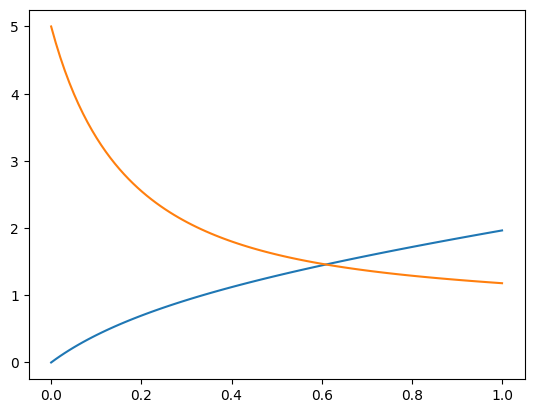

In [ ]:
plt.plot(t, x_sol)
plt.plot(t, v_sol)

Example: These two 3rd Order ODEs are converted into six 1st Order ODEs

In [ ]:
def dSdt(t, S):
    x1, v1, a1, x2, v2, a2 = S
    return [v1, a1, -2*v2**2 + x2, v2, a2, -a1**3 + v2 + v1 + np.sin(t)]
x1_0 = 0
v1_0 = 0
a1_0 = 0
x2_0 = 0
v2_0 = 0
a2_0 = 0
v_0 = 0
S_0 = (x1_0, v1_0, a1_0, x1_0, v1_0, a1_0)

In [ ]:
t = np.linspace(0, 1, 100)
sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

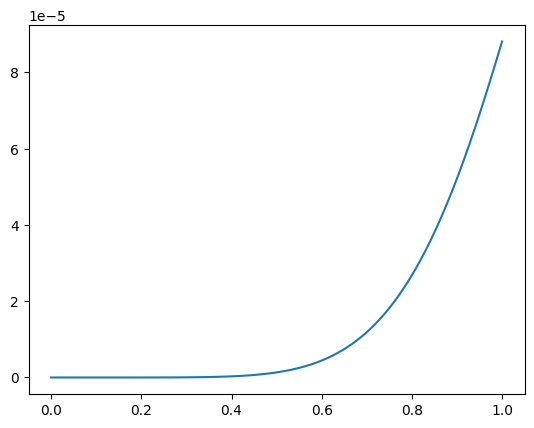

In [ ]:
plt.plot(t,sol.T[0])